<h1 align = center> Capstone Project-Battle of The Neighborhoods</h1>
<h3 align=center> Determining the optimal location to start an African restaurant in Atlanta, GA</h3>
<h3 align=center>Applied Data Science Capstone by IBM/Coursera</h3>
<h4 align =center>Marc-Henri Bleu-Laine  </h>

## Problem Statement and Background
<img src="ATL.jpg" title="Atlanta Skyline" />

New businesses all face the same issue before they even start operating: finding the ideal location. In particular, opening a new African restaurant in the city of Atlanta, Georgia is not an easy task. There are several common questions that new restaurant/business owners ask themselves[[1]](http://alltopstartups.com/2018/03/15/the-importance-of-location-in-business)[[2]](https://www.thebalancesmb.com/choosing-restaurant-location-2888543):
<ul>
    <li>Does the success of your restaurant rely heavily on customer traffic?</li>
    <li>Does the location of the restaurant bring visibility?</li>
    <li>Are there already other restaurants proposing the same service in the neighborhood?</li>
    <li>What are the owner's and the landloard's responsabilities? Does the location rent meet the business budget?</li>
    <li>Is the location and the building safe? </li>
    <li>etc...</li>
</ul>
There is a strong African community in Atlanta as well as more and more people willing to try food from the continent. The potential market is large and it could help advance the culture that remains somewhat unknown.   
  
For this work the word "African" is used, it was chosen to be general as the work is meant to be a proof of concept. Also, there are limited amount of African restaurants in Atlanta, so grouping all of them under the "African" umbrella makes more sense. For an actual customer, it will be better to focus on actually what type of African restaurant is to be opened (i.e. Ivorian, Ethipian, etc...).  
  
The work focuses on trying to help find the best location for a new African restaurant in the city of Atlanta, GA. The ideal location has few African competitors (African restaurants are limited in a given neighborhood), but is still known for its restaurants and activities (top places are restaurants, and other venue categories that attract lots of people regularly). This location also has low crime rate as well as a cheap rent.  
  
Obviously, choosing the right neighborhoods gets complicated when taking into account all these parameters. Using the K-Means clustering algorithms implemented in the sklearn library, it is possible to group neighborhoods by their similarities, which would help the restaurant owner find a list of potential neighborhoods in which the business could strive. 

## Data Description
Data fusion of multiple datasets will be used for this project. The common information that will be used to join the data are the neighboorhood names

#### Foursquare [[3]](https://foursquare.com)

The main source of data used will be FourSquare since it contains information about venues, their names, their location (which neighborhood), and their categories. Using this source, the venues will be grouped by their categories and the frequencies of each category would be determined for each neighborhood.

#### Zillow Rent Index [[4]](https://www.zillow.com/corp/About.htm)

Zillow is the leading real estate and rental marketplace dedicated to empowering consumers with data, inspiration and knowledge around the place they call home, and connecting them with the best local professionals who can help. Zillow Rent Index (ZRI) is used to track the monthly median rent in particular geographical regions.  
The data contains the monthly rent in dollar of the rent of single family, condominium, cooperative, and multifamily. The average median of year 2019 will be used. A snapshot of the dataset is presented below. The rent values are grouped by neighborhoods

In [1]:
import pandas as pd
directory = "Applied Capstone\\Dataset"
ZRI = pd.read_excel(directory+"\\AllHomesPlusMultifamily.xlsx", skipfooter=1)
ZRI[ZRI.State=="GA"].head(2)

RegionID RegionName     City State                          Metro  \
646    269381    Midtown  Atlanta    GA  Atlanta-Sandy Springs-Roswell   
797    269306   Downtown  Atlanta    GA  Atlanta-Sandy Springs-Roswell   

        CountyName  SizeRank  2010-11  2010-12  2011-01   ...     2018-08  \
646  Fulton County       647   1378.0   1361.0   1361.0   ...        1788   
797  Fulton County       798   1172.0   1157.0   1162.0   ...        1464   

     2018-09  2018-10  2018-11  2018-12  2019-01  2019-02  2019-03  2019-04  \
646     1786     1792     1820     1850     1870     1866     1864     1869   
797     1466     1475     1516     1573     1621     1637     1638     1641   

     2019-05  
646     1885  
797     1640  

[2 rows x 110 columns]

#### COBRA [[5]](http://www.atlantapd.org/i-want-to/crime-data-downloads)

COBRA is a dataset obtained from the Atlanta Police Department. It contains the number of crimes, their types, and their location in the city of Atlanta.

In [2]:
ATLCrime = pd.read_excel(directory+"\\ATL_Crime_2019.xlsx", skipfooter=1)
ATLCrime.head(2)

Report Number Report Date Occur Date Occur Time Possible Date  \
0      190010138  2019-01-01 2019-01-01         20    2019-01-01   
1      190010299  2019-01-01 2019-01-01        120    2019-01-01   

   Possible Time   Beat Apartment Office Prefix Apartment Number  \
0             25  511.0                     NaN              NaN   
1            130  511.0                     NaN              NaN   

                 Location Shift Occurrence Location Type          UCR Literal  \
0  50 UPPER ALABAMA ST SW    Morning Watch            13  LARCENY-NON VEHICLE   
1             20 BROAD ST    Morning Watch           NaN  LARCENY-NON VEHICLE   

   UCR # IBR Code Neighborhood NPU  Latitude  Longitude  
0    620     2302     Downtown   M  33.75194  -84.38964  
1    620     2302     Downtown   M  33.75312  -84.39208

## English-hilfen.de [[6]](https://www.englisch-hilfen.de/en/words/countries_af.htm)

The website was rapidly used for webscraping the African nationalities (Ivorian, Ethiopian, Egyptian, etc). 

## Methodology
<i><b>Zillow and Cobra Datasets Cleaning & Visualization</b></i>  
The first step was to find the average rent for 2019 for each neighboord in the dataset, then coordinates (latitude and longitude) of the neighborhoods in the Zillow data were determined using the geopy API. This was a sanity check to make sure that the neighborhoods tackled were spreadout throughout the whole city (as it can be been seen on one of the maps below). Some neighborhoodd were not found by the geolocator method and were therefore hardcoded or the neighborhood name was changed such that the geolocator method finds the coordinates.  
Regarding the Cobra dataset from the Atlanta Police Department, the first step taken was to look at the unique types of crimes that happened in the city of Atlanta for the year 2019. It waas then judged that all these type of crimes could be dangerous to a business owner or their customers therefore all of the types were counted as a crime. The number of crime reports was grouped by neighborhoods.  
The two datasets (Zillow and Cobra) were then fused into one pandas dataframe containing the neighborhoods, the average rent per neighborhoods, the coordinates (latitude, longitude) and the number of crimes in a neighborhood. Note that because the two dataset did not include the same number of neighborhoods (Zillow was the limiting dataset), a shorter list of neighborhoods was obtained from this fusion.    

<i><b>Foursquare Dataset</b></i>  
Using the neighborhoods in the fused dataset and the Foursqure API, up to a 100 venues in a radius of 1,000 meters were found for each neighborhood. The API call returned more than 3,000 venues for 90 neighborhoods of Atlanta. These venues were categorized into more than 300 unique categories, and more than 650 venues were restaurants.  
Some quick webscraping was done in order to find all the possible African nationalities. A lot of the restaurant will state the nationality of the restaurant (e.g. French Restaurant), therefore to count the number of African restaurants that were found all the African nationalities were checked against the restaurants' categories. The word "African" was included to make the search more exhaustive. This helped identified 6 African restaurants overall, showing that there is limited competition. The frequency of appearance of a particular venue category was then determined for each neighborhood, allowing me to find the 10 most common venues in each neighborhood. This information was fused with the crime rate, the average rent, and the number of African restaurants, which yielded the final dataframe.    

<i><b>Neighborhood Clustering & Decision Making</b></i>  
The elbow method was used to find the optimal number of clusters which happened to be 5. More information about the elbow method can be found [here](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). The method consist in finding the percentage of variance contained in the clusters. As you add more clusters, more variance is explained by them. However after some point there is diminishing return in adding more clusters (variance is only slightly more explained with additional clusters), the number of cluster at that moment is then the optimal one. The K-Means algorithm was then used to cluster the neighborhoods. More information about K-Means is found [here](https://en.wikipedia.org/wiki/K-means_clustering). It is a well-known algoirthm used for clustering purposes. It initially randomly establish a number of centers for the clusters, then find the distance from all the points in the dataset to these centers. The points that are closer to a center are considered to be in the same cluster. New centroids can be found by averaging the points in a given center, and new distance from the data points to the centroid can be calculated. The process is repeated until convergence is achieved (centroids no longer move). 

Technique for Ordered Preference by Similarity to Ideal Solution (TOPSIS) is then use to perform a multi-attribute decision. It is a step-by-step process for which a function was created and the used equations can be followed from the code. More information about TOPSIS is availeable [here](https://en.wikipedia.org/wiki/TOPSIS). The function works by specifying if the features relative importance (weights given to each feature, for example below I gave more importance to the rent feature). The direction of feature is also specified, and by dicrection it is meant whether or not we would like to maximize or minimize a given feature (for example, we want to minimize rent).

## Results & Discussion

Once the clusters were found, it possible to look at them individually in more details. The following comments were made after taking a closer look at the clusters.  
<i>Remarks about cluster 0:</i>
- The second largest cluster created
- Contains most of the African restaurants
- Highest crime rate
- Highest average rent
- Diverse neighborhoods in terms of venues but seems to contain the most food places in its most common ones

<i>Remarks about cluster 1:</i>
- Smallest cluster
- Lowest rent price
- No African restaurants
- Lowest crime rate
- Does not look appealing in terms of restauration (only the 7th and 10th most common venues are ones)

<i>Remarks about cluster 2:</i>
- It has the second lowest crime rate
- Quite a good amount of restaurants in its most common venues
- Has two African restaurants
- Second highest rent

<i>Remarks on cluster 3:</i>
- It has no African restaurant
- It is the second largest cluster and has the second largest crime rate
- Average rent is on the lower side
- An okay amount of restaurants ( lots of fast-food)
- Second largest crime rate

<i>Remarks on cluster 4:</i>
- Third largest rent
- Okay amount of restaurants
- One African restaurant
- Third largest crime rate   

Furthermore, by applying TOPSIS to the cluster options, it came out that cluster 3 seemed the best suited for my weighted preferences, and this suggest that a neighborhood in that cluster should be selected. A restaurant popularity feature was used, and the reason behind that feature was to check how frequently restaurants were present in the top places of the clusters. That feature was then quantified using an internal scale (3 highly popular, 2 medium, and 1 least popular).  

It is obvious that for other weights the TOPSIS results would change making this approach customizable. The framework used to lead to this is also repeatable for any city, and any type of restaurants. More analysis could be done however, here are some suggestions: 
- Include the ranking of the venues to see which one you are competing against
- Acquire missing data for some neighborhoods so that they can be included in the cluster
- Add the different types of crime in the dataset and weight them differently 
- Cluster within a cluster to find even more insights about the neighborhoods 
- More rigorous quantification of restaurant popularity could be done

## Conclusion

The goal of this project was find an optimal location to open an African restaurant in Atlanta. The optimal location was defined as a placed with low rent, low crime rate, low African competition but high popularity of the location for its restaurants. Using this information, relevant datasets were found, and combined resulting in a fused dataset capture all these aspects. The data sources were Foursquare, the Atlanta Police Department, Zillow and english-hilfen.de website. The final dataset included the rent, crime rate, most common venues, and the number of African restaurants in a given neighborhood. This allowed the usage of K-Means, an unsupervised machine learning, to cluster the neighborhoods into 5 groups. The groups were analyzed and information was extracted from them. The extract information was then processed using a multi-attribute decision making technique (TOPSIS) that suggested that the cluster 3 was ideal. Within that cluster there are multiple neighborhoods, the stakeholder would then need to see if any of these neighborhood can be chosen based on the current information.

## Zillow and Cobra Datasets Cleaning & Visualization

In [3]:
# !pip install geopy

In [4]:
# !pip install folium

In [5]:
import numpy as np
import folium 
from geopy.geocoders import Nominatim

In [6]:
ZRI_ATL = ZRI[ZRI.City=="Atlanta"]
ZRI_ATL = ZRI_ATL.rename(columns={"RegionName":"Neighborhood"})
print("Number of Neighborhoods: {}".format(np.unique(ZRI_ATL.Neighborhood).size))

Number of Neighborhoods: 100


In [7]:
ZRI_ATL.head(3)

RegionID     Neighborhood     City State                          Metro  \
646     269381          Midtown  Atlanta    GA  Atlanta-Sandy Springs-Roswell   
797     269306         Downtown  Atlanta    GA  Atlanta-Sandy Springs-Roswell   
1102    269397  Old Fourth Ward  Atlanta    GA  Atlanta-Sandy Springs-Roswell   

         CountyName  SizeRank  2010-11  2010-12  2011-01   ...     2018-08  \
646   Fulton County       647   1378.0   1361.0   1361.0   ...        1788   
797   Fulton County       798   1172.0   1157.0   1162.0   ...        1464   
1102  Fulton County      1103   1178.0   1161.0   1150.0   ...        1656   

      2018-09  2018-10  2018-11  2018-12  2019-01  2019-02  2019-03  2019-04  \
646      1786     1792     1820     1850     1870     1866     1864     1869   
797      1466     1475     1516     1573     1621     1637     1638     1641   
1102     1654     1668     1713     1772     1820     1834     1835     1829   

      2019-05  
646      1885  
797      1640  
1102     1817  

[3 rows x 110 columns]

Getting rid of any missing values, if any

In [8]:
print("Shape of ZRI_ATL before dropping NaNs: [{}, {}]".format(ZRI_ATL.shape[0],ZRI_ATL.shape[1]))
ZRI_ATL = ZRI_ATL.dropna()
print("Shape of ZRI_ATL after dropping NaNs: [{}, {}]".format(ZRI_ATL.shape[0],ZRI_ATL.shape[1]))

Shape of ZRI_ATL before dropping NaNs: [100, 110]
Shape of ZRI_ATL after dropping NaNs: [100, 110]


There was no missing value  
Let's now average the the  2019 rent values in these neighborhoods. We will also add the latitude and longitude of these neighborhoods to this data frame

In [9]:
geolocator = Nominatim(user_agent="foursquare_agent")

In [10]:
features = ["Neighborhood", "2019-01", "2019-02", "2019-03", "2019-04", "2019-05"]
ZRI_ATL= ZRI_ATL[features]
ZRI_ATL["AverageRent"] =  np.mean(ZRI_ATL.iloc[:,1:], axis=1)
ZRI_ATL = ZRI_ATL[["Neighborhood", "AverageRent"]]
ZRI_ATL["Latitude"] = np.nan; ZRI_ATL["Longitude"]= np.nan;
for i, neigh in enumerate(ZRI_ATL.Neighborhood):
    if "Glenrose" in neigh:
        neigh = "Glenrose"
    elif "Lindridge" in neigh:
        neigh = "Lindridge"
    elif "Cascade Avenue" in neigh:
        neigh = "Cascade Avenue"
    elif "Paran" in neigh:
        neigh = "Paran"
    elif "Peachtree Battle" in neigh:
        neigh= "Peachtree Battle"
    elif "West Paces" in neigh:
        neigh= "West Paces"
    elif "East Chastain" in neigh:
        neigh="East Chastain"
    elif  "Arlington" in neigh:
        neigh = "Arlington"
        
    neigh = neigh+", Atlanta"
    print("{}, #{}".format(neigh,i+1))
    location = geolocator.geocode(neigh, timeout=10)
    if "Chosewood" in neigh:
        ZRI_ATL.iloc[i, 2] = 33.7204
        ZRI_ATL.iloc[i, 3] = 84.3765
    elif "Poncey-H" in neigh:
        ZRI_ATL.iloc[i, 2]= 33.7695
        ZRI_ATL.iloc[i, 3] =84.3555
    elif "Midwest Cascade" in neigh:
        ZRI_ATL.iloc[i, 2]=33.7286
        ZRI_ATL.iloc[i, 3]=84.5301
    else:
        ZRI_ATL.iloc[i, 2] = location.latitude
        ZRI_ATL.iloc[i, 3] = location.longitude
print("Dimension of reduced dataset: [{}, {}]".format(ZRI_ATL.shape[0], ZRI_ATL.shape[1]))
ZRI_ATL.head()

Midtown, Atlanta, #1
Downtown, Atlanta, #2
Old Fourth Ward, Atlanta, #3
North Buckhead, Atlanta, #4
Morningside - Lenox Park, Atlanta, #5
Pine Hills, Atlanta, #6
Grant Park, Atlanta, #7
Home Park, Atlanta, #8
Virginia Highland, Atlanta, #9
Kirkwood, Atlanta, #10
Collier Heights, Atlanta, #11
Glenrose, Atlanta, #12
Campbellton Road, Atlanta, #13
West End, Atlanta, #14
Lindbergh, Atlanta, #15
Ormewood Park, Atlanta, #16
East Atlanta, Atlanta, #17
Greenbriar, Atlanta, #18
Sylvan Hills, Atlanta, #19
Venetian Hills, Atlanta, #20
Edgewood, Atlanta, #21
Lindridge, Atlanta, #22
Garden Hills, Atlanta, #23
Inman Park, Atlanta, #24
Peachtree Heights West, Atlanta, #25
Chosewood Park, Atlanta, #26
Oakland City, Atlanta, #27
Underwood Hills, Atlanta, #28
Southwest, Atlanta, #29
Candler Park, Atlanta, #30
Reynoldstown, Atlanta, #31
East Lake, Atlanta, #32
Mechanicsville, Atlanta, #33
Grove Park, Atlanta, #34
Pittsburgh, Atlanta, #35
Chastain Park, Atlanta, #36
West View, Atlanta, #37
Poncey-Highland

Neighborhood  AverageRent   Latitude  Longitude
646                    Midtown       1870.8  33.781646 -84.386379
797                   Downtown       1635.4  33.748309 -84.392118
1102           Old Fourth Ward       1827.0  33.762858 -84.373097
1526            North Buckhead       2301.4  33.839814 -84.379559
1534  Morningside - Lenox Park       3778.2  33.807116 -84.353302

Because of  unmatching names some neighborhood's latitudes and longitudes could not be found using the  geocode method, the name of the neighborhood was then manually changed or the  coordinates were manually inserted. This is the case for:
<ul>
    <li>Glenrose Park</li>
    <li>Lindridge-Martin Manor </li>
    <li>Chosenwood  Park</li>
    <li>Cascade Avenue  </li>
    <li>Mt. Paran</li>
    <li>Peachtree Battle</li>
    <li>West Paces</li>
    <li>East Chastain</li>
    <li>Arlington Estates</li>
    <li>Poncey-Heights</li>
    <li>Midwest Cascade</li>
</ul>
The proceess of finding these 11 corrections out of 100 was done manually by inserting a print statement in the code above

Let's visualize the neighborhoods in Atlanta using folium

In [11]:
address = "Atlanta, GA"
location =  geolocator.geocode(address)
latitude = location.latitude
longitude= location.longitude
print("The coordinate of Atlanta, GA are: {},{}".format(latitude, longitude))

The coordinate of Atlanta, GA are: 33.7490987,-84.3901849


In [12]:
map_atl = folium.Map(location =[latitude, longitude], zoom_start=12)
for lat, lng, rent in zip(ZRI_ATL["Latitude"], ZRI_ATL["Longitude"], ZRI_ATL["AverageRent"]):
    label = folium.Popup(str(rent))
    folium.CircleMarker([lat, lng],
                        radius=5,
                        popup = label,
                        color='blue',
                        #fill = true,
                        fill_color='#3186cc',
                        fill_opacity=0.7).add_to(map_atl)
map_atl

Let's look at the different type of crimes that exists

In [13]:
# Reminder of what the dataset look likes
ATLCrime.head(3)

Report Number Report Date Occur Date Occur Time Possible Date  \
0      190010138  2019-01-01 2019-01-01         20    2019-01-01   
1      190010299  2019-01-01 2019-01-01        120    2019-01-01   
2      190011858  2019-01-01 2019-01-01       1740    2019-01-01   

   Possible Time   Beat Apartment Office Prefix Apartment Number  \
0             25  511.0                     NaN              NaN   
1            130  511.0                     NaN              NaN   
2           1750  411.0                     NaN              A15   

                          Location Shift Occurrence Location Type  \
0           50 UPPER ALABAMA ST SW    Morning Watch            13   
1                      20 BROAD ST    Morning Watch           NaN   
2  3000 CONTINENTAL COLONY PKWY SW    Evening Watch            26   

           UCR Literal  UCR # IBR Code Neighborhood NPU  Latitude  Longitude  
0  LARCENY-NON VEHICLE    620     2302     Downtown   M  33.75194  -84.38964  
1  LARCENY-NON VEHICLE    620     2302     Downtown   M  33.75312  -84.39208  
2  LARCENY-NON VEHICLE    620     2302   Greenbriar   R  33.68077  -84.49370

In [14]:
for i,crime in enumerate(np.unique(ATLCrime["UCR Literal"])):
    if i==0:
        print("List of crime types:")
    print(crime)

List of crime types:
AGG ASSAULT
AUTO THEFT
BURGLARY-NONRES
BURGLARY-RESIDENCE
HOMICIDE
LARCENY-FROM VEHICLE
LARCENY-NON VEHICLE
MANSLAUGHTER
ROBBERY-COMMERCIAL
ROBBERY-PEDESTRIAN
ROBBERY-RESIDENCE


From this list, we can see that any of these crimes could happen to the customers of the new restaurant or to the restaurant owner. We will then take into account all these crimes.  
Let's quickly visualize where the crimes happen in Atlanta

In [15]:
map_atl = folium.Map(location =[latitude, longitude], zoom_start=10)
for lat, lng in zip(ATLCrime["Latitude"], ATLCrime["Longitude"]):
    folium.CircleMarker([lat, lng],
                        radius=5,
                        color='blue',
                        fill_color='#3186cc',
                        fill_opacity=0.7).add_to(map_atl)
map_atl

Let's now count the number of crimes that occur per neighborhood

In [16]:
# Remove rows that have no entries in the neighborhood column
print("Shape of ATL Crime before dropping NaNs: [{}, {}]".format(ATLCrime.shape[0],ATLCrime.shape[1]))
ATLCrime = ATLCrime[pd.notnull(ATLCrime['Neighborhood'])]
print("Shape of ATL Crime before dropping NaNs: [{}, {}]".format(ATLCrime.shape[0],ATLCrime.shape[1]))
ATLCrime.groupby("Neighborhood").count()

Shape of ATL Crime before dropping NaNs: [10902, 19]
Shape of ATL Crime before dropping NaNs: [10497, 19]


Report Number  Report Date  Occur Date  \
Neighborhood                                                               
Adair Park                                   63           63          63   
Adams Park                                   33           33          33   
Adamsville                                  119          119         119   
Almond Park                                  13           13          13   
Amal Heights                                  4            4           4   
Ansley Park                                  18           18          18   
Arden/Habersham                               1            1           1   
Ardmore                                      27           27          27   
Argonne Forest                                4            4           4   
Arlington Estates                            11           11          11   
Ashley Courts                                 8            8           8   
Ashview Heights                              44           44          44   
Atkins Park                                   1            1           1   
Atlanta Industrial Park                       3            3           3   
Atlanta University Center                    52           52          52   
Atlantic Station                             98           98          98   
Audobon Forest                                2            2           2   
Audobon Forest West                           2            2           2   
Baker Hills                                   8            8           8   
Bakers Ferry                                  3            3           3   
Bankhead                                     57           57          57   
Bankhead/Bolton                              14           14          14   
Beecher Hills                                 9            9           9   
Ben Hill                                     24           24          24   
Ben Hill Acres                                5            5           5   
Ben Hill Forest                               1            1           1   
Ben Hill Pines                                3            3           3   
Ben Hill Terrace                             13           13          13   
Benteen Park                                 19           19          19   
Berkeley Park                               163          163         163   
...                                         ...          ...         ...   
Tampa Park                                    3            3           3   
The Villages at Carver                       49           49          49   
The Villages at Castleberry Hill             11           11          11   
The Villages at East Lake                    29           29          29   
Thomasville Heights                          77           77          77   
Tuxedo Park                                  11           11          11   
Underwood Hills                              71           71          71   
Venetian Hills                               76           76          76   
Vine City                                   228          228         228   
Virginia Highland                           143          143         143   
Washington Park                              33           33          33   
Wesley Battle                                 4            4           4   
West End                                    229          229         229   
West Highlands                               32           32          32   
West Lake                                    25           25          25   
West Manor                                    3            3           3   
West Paces Ferry/Northside                   20           20          20   
Westhaven                                     6            6           6   
Westminster/Milmar                            2            2           2   
Westover Plantation                           3            3           3   
Westvi

We will assume that whenever there is a report then there was a crime, so the report column will be used to count the number of crimes occuring in a given neighborhood

In [17]:
ATL_Crime_Count = ATLCrime.groupby("Neighborhood")
ATL_Crime_Count =pd.DataFrame({'count' : ATL_Crime_Count.size()}).reset_index()
ATL_Crime_Count.head()

Neighborhood  count
0    Adair Park     63
1    Adams Park     33
2    Adamsville    119
3   Almond Park     13
4  Amal Heights      4

We can take a look at the most neighborhoods with the highest crime rates

In [18]:
# Top 5 neighborhoods with highest crime rates 
ATL_Crime_Count.sort_values("count",ascending=False).head()

Neighborhood  count
76            Downtown    824
141            Midtown    686
154    Old Fourth Ward    285
130  Lindbergh/Morosgo    271
210           West End    229

In [19]:
print("Number of Neighborhoods: {}".format(np.unique(ATL_Crime_Count.Neighborhood).size))

Number of Neighborhoods: 228


There is mismatch in the number of neighborhoods from the rent and the crime data. Since the rent data has less unique neighborhoods, we will use the neighborhoods that it contains. Let's merge the two datasets together

In [20]:
ATL = pd.merge(ZRI_ATL, ATL_Crime_Count)
ATL.head()

Neighborhood  AverageRent   Latitude  Longitude  count
0          Midtown       1870.8  33.781646 -84.386379    686
1         Downtown       1635.4  33.748309 -84.392118    824
2  Old Fourth Ward       1827.0  33.762858 -84.373097    285
3   North Buckhead       2301.4  33.839814 -84.379559    201
4       Pine Hills       1709.6  33.919825 -84.170473     44

In [21]:
print("Number of neighborhoods combined: {}".format(ATL.shape[0]))

Number of neighborhoods combined: 93


## Foursquare Dataset

 We will first gather neighborhood data from Foursquare and for  simplicity a maximum of 100 venues in a 1000 meter radius of each  neighborhood will be collected 

In [22]:
# Defining Foursquare  Credentials
CLIENT_ID = ''
CLIENT_SECRET = ""
VERSION = "20180604"
LIMIT = 100 
radius = 1000

In [23]:
import requests

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
                 # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={}, {}&radius={}&limit={}".format(\
        CLIENT_ID,
        CLIENT_SECRET, VERSION,
        lat,
        lng,
        radius,
        LIMIT)
           # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
                 # return only relevant information for each nearby venue
        venues_list.append([( name,
                        lat,
                        lng,
                        v['venue']['name'],
                        v['venue']['location']['lat'], v['venue']['location']['lng'],
                         v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood',
                           'Neighborhood Latitude',
                           'Neighborhood Longitude',
                           'Venue',
                           'Venue Latitude',
                            'Venue  Longitude',
                           'Venue Category']
    return(nearby_venues)

In [25]:
ATL_venues = getNearbyVenues(names=ATL.Neighborhood, latitudes=ATL.Latitude, longitudes=ATL.Longitude, radius=radius)

Midtown
Downtown
Old Fourth Ward
North Buckhead
Pine Hills
Grant Park
Home Park
Virginia Highland
Kirkwood
Collier Heights
Glenrose Heights
Campbellton Road
West End
Ormewood Park
East Atlanta
Greenbriar
Sylvan Hills
Venetian Hills
Edgewood
Garden Hills
Inman Park
Peachtree Heights West
Chosewood Park
Oakland City
Underwood Hills
Southwest
Candler Park
Reynoldstown
East Lake
Mechanicsville
Grove Park
Pittsburgh
Chastain Park
Poncey-Highland
Adamsville
Browns Mill Park
Summerhill
Vine City
English Avenue
Peachtree Hills
Lake Claire
Capitol View
Lakewood Heights
Thomasville Heights
Paces
Brookhaven
Peoplestown
Perkerson
Princeton Lakes
Buckhead Forest
Center Hill
Castleberry Hill
Adams Park
Bolton
Ridgedale Park
Ansley Park
Hammond Park
Atlantic Station
Cascade Heights
Hills Park
Adair Park
Brookwood Hills
Hunter Hills
Ashview Heights
Peachtree Battle Alliance
Druid Hills
Cross Creek
Mozley Park
Bankhead
Dixie Hills
Tuxedo Park
Buckhead Village
Fairburn Heights
South Atlanta
Brookwood
Wa

In [26]:
print(ATL_venues.shape)
ATL_venues.head()

(3611, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Midtown              33.781646              -84.386379   
1      Midtown              33.781646              -84.386379   
2      Midtown              33.781646              -84.386379   
3      Midtown              33.781646              -84.386379   
4      Midtown              33.781646              -84.386379   

                      Venue  Venue Latitude  Venue  Longitude  \
0                Cafe Agora       33.780932        -84.384460   
1         Mac's Beer & Wine       33.780916        -84.387992   
2           Savi Provisions       33.781010        -84.384278   
3  Brazilian Wax by Andreia       33.780646        -84.387739   
4  Dancing Goats Coffee Bar       33.780810        -84.386653   

             Venue Category  
0  Mediterranean Restaurant  
1              Liquor Store  
2              Gourmet Shop  
3                       Spa  
4               Coffee Shop

Count the number of venues retrieved for each neighborhood

In [27]:
ATL_venues.groupby('Neighborhood')["Venue"].count()

Neighborhood
Adair Park                    25
Adams Park                    23
Adamsville                    19
Ansley Park                  100
Ardmore                       50
Arlington Estates             14
Ashview Heights                9
Atlantic Station             100
Bankhead                       3
Bolton                        28
Brookhaven                    47
Brookwood                     49
Brookwood Hills               77
Browns Mill Park               8
Buckhead Forest              100
Buckhead Village             100
Cabbagetown                  100
Campbellton Road               3
Candler Park                  46
Capitol View                  13
Carroll Heights                4
Cascade Heights               14
Castleberry Hill              61
Center Hill                   11
Chastain Park                 35
Collier Heights                7
Cross Creek                   31
Dixie Hills                    4
Downtown                      80
Druid Hills                   

In [28]:
print('There are {} uniques categories.'.format(len(ATL_venues['Venue Category'].unique())))
print('There are {} neighorhoods.'.format(len(ATL_venues['Neighborhood'].unique())))

There are 310 uniques categories.
There are 90 neighorhoods.


Notice that the number of neighborhoods retrieved from Foursquare is less than the number of neighborhoods that we got from fusing the APD and the Zillow data earlier. This will restrain our analysis. 

In [29]:
mask_restaurant = ["restaurant" in j.lower() for j in ATL_venues["Venue Category"]]
print("Number of restaurant: {}".format(len(ATL_venues["Venue Category"][mask_restaurant])))
ATL_venues["Venue Category"][mask_restaurant].head()

Number of restaurant: 683


0            Mediterranean Restaurant
5                  Seafood Restaurant
7             New American Restaurant
8     Southern / Soul Food Restaurant
10           Mediterranean Restaurant
Name: Venue Category, dtype: object

Let's check if any African nationalities are found in the list of restaurant. Some quick webscrapping was done and the nationalities were extracted from this [website](https://www.englisch-hilfen.de/en/words/countries_af.htm)

In [30]:
from bs4 import BeautifulSoup

In [31]:
url =" https://www.englisch-hilfen.de/en/words/countries_af.htm"
source = requests.get(url).text
rawdata = BeautifulSoup(source,'lxml')
table =rawdata.find("main")
nationalities = rawdata.find_all("td")[5::6]
nationalities = [i.get_text() for i in nationalities]
# Add the word African 
nationalities.append("African")
nationalities.remove("**")
nationalities.remove("**")
nationalities.remove("**")
print("Number of nationalities: {}".format(len(nationalities)))

Number of nationalities: 51


In [32]:
nationalities

['Algerian',
 'Angolan',
 'Beninese',
 'Batswana',
 'Burkinese',
 'Burundian',
 'Cameroonian',
 'Cape Verdean',
 'Chadian',
 'Comoran',
 'Congolese',
 'Congolese',
 'Djiboutian',
 'Egyptian',
 'Equatorial Guinean',
 'Eritrean',
 'Ethiopian',
 'Gabonese',
 'Gambian',
 'Ghanian',
 'Guinean',
 'Guinean',
 'Kenyan',
 'Basotho',
 'Liberian',
 'Libyan',
 'Madagascan',
 'Malawian',
 'Malian',
 'Mauretanian',
 'Mauritian',
 'Moroccan',
 'Mozambiquean',
 'Namibian',
 'Nigerian',
 'Nigerian',
 'Rwandan',
 'Senegalese',
 'Seychellois',
 'Sierra Leonean',
 'Somali',
 'South African',
 'Sudanese',
 'Swazi',
 'Tanzanian',
 'Togolese',
 'Tunisian',
 'Ugandan',
 'Zambian',
 'Zimbabwean',
 'African']

Some of the nationalities were not stated on the website, hence the presence of  "**"

In [34]:
# Creating a logical array that checks if a nationality name is present in the one of the restaurant name
nationality_check = [nationality.lower() in restaurant.lower() for nationality in nationalities for restaurant in ATL_venues["Venue Category"][mask_restaurant]]
# reorganize the list
nationality_check = np.split(np.asarray(nationality_check),51)
nationality_check = [any(nationality) for nationality in nationality_check]
print("Verifying the length of the nationality check list: {}".format(len(nationality_check)))
print("Are there any nationalities in the restaurant names? {} (True means yes, False means no)".format(any(nationality_check)))

Verifying the length of the nationality check list: 51
Are there any nationalities in the restaurant names? True (True means yes, False means no)


Let's identify which African cuisine is present in Atlanta

In [35]:
present_nationalities = np.asarray(nationalities)[nationality_check]
print("Nationalities present:")
for i in present_nationalities:
    print(i)

Nationalities present:
Ethiopian
Moroccan
African


As we can, now a lot of them. We therefore, want to avoid direct competition and choose an area where these are not present . Let's count how many of these exists

In [36]:
ATL_restaurants = ATL_venues["Venue Category"][mask_restaurant]
Ethio_restaurant = ATL_venues[ATL_venues["Venue Category"]== "Ethiopian Restaurant"]
Moroccan_restaurant = ATL_venues[ATL_venues["Venue Category"]== "Moroccan Restaurant"]
African_restaurant = ATL_venues[ATL_venues["Venue Category"]== "African Restaurant"]
print("Number of Ethipian restaurants: {}\nNumber of Morocan restaurants: {}\nNumber of African restaurants: {}".format(len(Ethio_restaurant), 
                                                                                     len(Moroccan_restaurant),
                                                                                    len(African_restaurant)))

Number of Ethipian restaurants: 1
Number of Morocan restaurants: 1
Number of African restaurants: 4


Let's use onehot encoding to specify what type of venues are present in which neighborhoods

In [37]:
# one hot encoding
ATL_onehot = pd.get_dummies(ATL_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ATL_onehot['Neighborhood'] = ATL_venues['Neighborhood']
mask = ATL_onehot.columns=="Neighborhood"

# move neighborhood column to the first column
fixed_columns = [ATL_onehot.columns[mask][0]] + list(ATL_onehot.drop(columns="Neighborhood", axis=1).columns)
ATL_onehot = ATL_onehot[fixed_columns]

ATL_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  African Restaurant  \
0      Midtown                  0               0                   0   
1      Midtown                  0               0                   0   
2      Midtown                  0               0                   0   
3      Midtown                  0               0                   0   
4      Midtown                  0               0                   0   

   Airport  American Restaurant  Amphitheater  Animal Shelter  Aquarium  \
0        0                    0             0               0         0   
1        0                    0             0               0         0   
2        0                    0             0               0         0   
3        0                    0             0               0         0   
4        0                    0             0               0         0   

   Arcade     ...       Warehouse Store  Weight Loss Center  Whisky Bar  \
0       0     ...                     0                   0           0   
1       0     ...                     0                   0           0   
2       0     ...                     0                   0           0   
3       0     ...                     0                   0           0   
4       0     ...                     0                   0           0   

   Wine Bar  Wine Shop  Wings Joint  Women's Store  Yoga Studio  Zoo  \
0         0          0            0              0            0    0   
1         0          0            0              0            0    0   
2         0          0            0              0            0    0   
3         0          0            0              0            0    0   
4         0          0            0              0            0    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 310 columns]

Averaging the frequencies in the difference neighborhoods 

In [38]:
ATL_grouped = ATL_onehot.groupby('Neighborhood').mean().reset_index()
ATL_grouped

Neighborhood  Accessories Store  Adult Boutique  \
0                  Adair Park           0.000000            0.00   
1                  Adams Park           0.000000            0.00   
2                  Adamsville           0.000000            0.00   
3                 Ansley Park           0.000000            0.01   
4                     Ardmore           0.000000            0.00   
5           Arlington Estates           0.000000            0.00   
6             Ashview Heights           0.000000            0.00   
7            Atlantic Station           0.010000            0.00   
8                    Bankhead           0.000000            0.00   
9                      Bolton           0.000000            0.00   
10                 Brookhaven           0.000000            0.00   
11                  Brookwood           0.000000            0.00   
12            Brookwood Hills           0.000000            0.00   
13           Browns Mill Park           0.000000            0.00   
14            Buckhead Forest           0.000000            0.00   
15           Buckhead Village           0.000000            0.00   
16                Cabbagetown           0.000000            0.00   
17           Campbellton Road           0.000000            0.00   
18               Candler Park           0.000000            0.00   
19               Capitol View           0.000000            0.00   
20            Carroll Heights           0.000000            0.00   
21            Cascade Heights           0.000000            0.00   
22           Castleberry Hill           0.000000            0.00   
23                Center Hill           0.000000            0.00   
24              Chastain Park           0.000000            0.00   
25            Collier Heights           0.000000            0.00   
26                Cross Creek           0.000000            0.00   
27                Dixie Hills           0.000000            0.00   
28                   Downtown           0.000000            0.00   
29                Druid Hills           0.000000            0.00   
..                        ...                ...             ...   
60            Old Fourth Ward           0.000000            0.00   
61              Ormewood Park           0.000000            0.00   
62                      Paces           0.000000            0.00   
63  Peachtree Battle Alliance           0.000000            0.00   
64     Peachtree Heights East           0.000000            0.00   
65     Peachtree Heights West           0.000000            0.00   
66            Peachtree Hills           0.000000            0.00   
67             Peachtree Park           0.000000            0.00   
68                Peoplestown           0.000000            0.00   
69                  Perkerson           0.000000            0.00   
70                 Pine Hills           0.000000            0.00   
71                 Pittsburgh           0.000000            0.00   
72                 Polar Rock           0.000000            0.00   
73            Princeton Lakes           0.000000            0.00   
74               Reynoldstown           0.000000            0.00   
75             Ridgedale Park           0.000000            0.00   
76                  Riverside           0.000000            0.00   
77              South Atlanta           0.000000            0.00   
78                  Southwest           0.000000            0.00   
79                 Springlake           0.000000            0.00   
80                 Summerhill           0.000000            0.00   
81               Sylvan Hills           0.000000            0.00   
82        Thomasville Heights           0.000000            0.00   
83                Tuxedo Park           0.000000            0.00   
84            Underwood Hills           0.013699            0.00   
85             Venetian Hills           0.000000            0.00   
86                  Vine City           0.000000            0.00   
87   

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's append the top 10 venues to each neighborhood

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ATL_grouped['Neighborhood']

for ind in np.arange(ATL_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ATL_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Adair Park                  Park          Liquor Store   
1   Adams Park           Gas Station        Sandwich Place   
2   Adamsville                  Food   Fried Chicken Joint   
3  Ansley Park                  Park                Garden   
4      Ardmore    Mexican Restaurant                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Trail           Gas Station     Convenience Store   
1     Convenience Store                  Food  Fast Food Restaurant   
2        Discount Store  Fast Food Restaurant           Gas Station   
3         Shopping Mall                  Café                 Trail   
4  Gym / Fitness Center                 Trail  Fast Food Restaurant   

     6th Most Common Venue          7th Most Common Venue  \
0                     Food           Caribbean Restaurant   
1              Golf Course                     Laundromat   
2              Roller Rink                   Liquor Store   
3      American Restaurant                   Tennis Court   
4  New American Restaurant  Vegetarian / Vegan Restaurant   

  8th Most Common Venue 9th Most Common Venue         10th Most Common Venue  
0       Automotive Shop              Boutique  Paper / Office Supplies Store  
1         Shopping Mall         Grocery Store            Fried Chicken Joint  
2    Seafood Restaurant            Laundromat           Gym / Fitness Center  
3           Coffee Shop  Gym / Fitness Center          Performing Arts Venue  
4              Pharmacy           Pizza Place                 Shipping Store

Let's fuse the datasets one more time, such that the number of crime and the the rent price is included into the previous data frame and add the number of African restaurants that each neighborhood has

In [41]:
ATL_final = pd.merge(neighborhoods_venues_sorted,ATL)
ATL_final.rename(columns={"count":"Number_of_crimes"}, inplace=True)
ATL_final.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Adair Park                  Park          Liquor Store   
1   Adams Park           Gas Station        Sandwich Place   
2   Adamsville                  Food   Fried Chicken Joint   
3  Ansley Park                  Park                Garden   
4      Ardmore    Mexican Restaurant                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Trail           Gas Station     Convenience Store   
1     Convenience Store                  Food  Fast Food Restaurant   
2        Discount Store  Fast Food Restaurant           Gas Station   
3         Shopping Mall                  Café                 Trail   
4  Gym / Fitness Center                 Trail  Fast Food Restaurant   

     6th Most Common Venue          7th Most Common Venue  \
0                     Food           Caribbean Restaurant   
1              Golf Course                     Laundromat   
2              Roller Rink                   Liquor Store   
3      American Restaurant                   Tennis Court   
4  New American Restaurant  Vegetarian / Vegan Restaurant   

  8th Most Common Venue 9th Most Common Venue         10th Most Common Venue  \
0       Automotive Shop              Boutique  Paper / Office Supplies Store   
1         Shopping Mall         Grocery Store            Fried Chicken Joint   
2    Seafood Restaurant            Laundromat           Gym / Fitness Center   
3           Coffee Shop  Gym / Fitness Center          Performing Arts Venue   
4              Pharmacy           Pizza Place                 Shipping Store   

   AverageRent   Latitude  Longitude  Number_of_crimes  
0       1332.6  33.724974 -84.411429                63  
1       1241.8  33.712052 -84.456873                33  
2       1168.6  33.759274 -84.505209               119  
3       2717.6  33.794550 -84.376315                18  
4       2813.8  33.806282 -84.400028                27

In [42]:
# Verifying the shape
ATL_final.shape

(90, 15)

Which neighnorhoods have African restaurants in them ?

In [43]:
mask_ethio = ATL_venues["Venue Category"]== "Ethiopian Restaurant"
mask_mor = ATL_venues["Venue Category"]== "Moroccan Restaurant"
mask_afri = ATL_venues["Venue Category"]== "African Restaurant"
sub_mask1 = mask_ethio != mask_mor
mask = sub_mask1 != mask_afri
African_rest_neigh = ATL_venues.loc[mask,:]
African_rest_neigh

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
371           Pine Hills              33.919825              -84.170473   
841             Edgewood              33.761773              -84.341314   
893         Garden Hills              33.919825              -84.170473   
1415       Chastain Park              33.871215              -84.391038   
2487     Brookwood Hills              33.807883              -84.390205   
3209  East Chastain Park              33.871215              -84.391038   

                        Venue  Venue Latitude  Venue  Longitude  \
371        Ike's Cafe & Grill       33.913862        -84.164949   
841             Kimi's Bistro       33.764525        -84.350513   
893        Ike's Cafe & Grill       33.913862        -84.164949   
1415         10 Degrees South       33.869082        -84.380529   
2487  Imperial Fez Restaurant       33.816470        -84.389963   
3209         10 Degrees South       33.869082        -84.380529   

            Venue Category  
371     African Restaurant  
841   Ethiopian Restaurant  
893     African Restaurant  
1415    African Restaurant  
2487   Moroccan Restaurant  
3209    African Restaurant

In [44]:
ATL_final["African_Restaurant"] = 0 
african_rest_check = [i == j for i in ATL_final.Neighborhood for j in African_rest_neigh.Neighborhood]
african_rest_check = np.split(np.asarray(african_rest_check), len(ATL_final.Neighborhood))
african_rest_check = [any(african_rest) for african_rest in african_rest_check ]
ATL_final.loc[african_rest_check,"African_Restaurant"] = 1
ATL_final.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Adair Park                  Park          Liquor Store   
1   Adams Park           Gas Station        Sandwich Place   
2   Adamsville                  Food   Fried Chicken Joint   
3  Ansley Park                  Park                Garden   
4      Ardmore    Mexican Restaurant                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Trail           Gas Station     Convenience Store   
1     Convenience Store                  Food  Fast Food Restaurant   
2        Discount Store  Fast Food Restaurant           Gas Station   
3         Shopping Mall                  Café                 Trail   
4  Gym / Fitness Center                 Trail  Fast Food Restaurant   

     6th Most Common Venue          7th Most Common Venue  \
0                     Food           Caribbean Restaurant   
1              Golf Course                     Laundromat   
2              Roller Rink                   Liquor Store   
3      American Restaurant                   Tennis Court   
4  New American Restaurant  Vegetarian / Vegan Restaurant   

  8th Most Common Venue 9th Most Common Venue         10th Most Common Venue  \
0       Automotive Shop              Boutique  Paper / Office Supplies Store   
1         Shopping Mall         Grocery Store            Fried Chicken Joint   
2    Seafood Restaurant            Laundromat           Gym / Fitness Center   
3           Coffee Shop  Gym / Fitness Center          Performing Arts Venue   
4              Pharmacy           Pizza Place                 Shipping Store   

   AverageRent   Latitude  Longitude  Number_of_crimes  African_Restaurant  
0       1332.6  33.724974 -84.411429                63                   0  
1       1241.8  33.712052 -84.456873                33                   0  
2       1168.6  33.759274 -84.505209               119                   0  
3       2717.6  33.794550 -84.376315                18                   0  
4       2813.8  33.806282 -84.400028                27                   0

## Neighborhood Clustering & Decision Making

The elbow method is used to determine an optimal number of clusters from 1-10 that will be created from the data

In [45]:
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from matplotlib.pyplot import Figure
%matplotlib inline

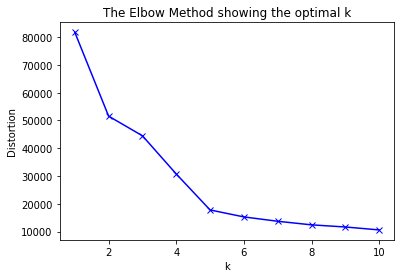

In [46]:
ATL_grouped_clustering = ATL_grouped.drop('Neighborhood', 1)
ATL_grouped_clustering["AverageRent"] = ATL_final["AverageRent"]
ATL_grouped_clustering["Number_of_crimes"] = ATL_final["Number_of_crimes"]
ATL_grouped_clustering["African_Restaurant"] = ATL_final["African_Restaurant"]
distortions=[]
silhouette_score_matrix = []
K=np.arange(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=2).fit(ATL_grouped_clustering)
    distortions.append(sum(np.min(cdist(ATL_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1))) 
    clusterlabels =kmeanModel.labels_
    if k >1:
        silhouette_avg = silhouette_score(ATL_grouped_clustering, clusterlabels)
        silhouette_score_matrix.append(silhouette_avg)

# Plot the elbow
fig = Figure(figsize=(13,9))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It seems like there is a diminishing return starting from k=5, five clusters where then using for KMeans

In [47]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ATL_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 4, 4, 3, 3, 0, 3, 0])

In [48]:
ATL_final.insert(0, 'Cluster Labels', kmeans.labels_)
ATL_final

Cluster Labels               Neighborhood    1st Most Common Venue  \
0                3                 Adair Park                     Park   
1                3                 Adams Park              Gas Station   
2                3                 Adamsville                     Food   
3                4                Ansley Park                     Park   
4                4                    Ardmore       Mexican Restaurant   
5                3          Arlington Estates                    Trail   
6                3            Ashview Heights         Football Stadium   
7                0           Atlantic Station              Pizza Place   
8                3                   Bankhead                 Pharmacy   
9                0                     Bolton                 Pharmacy   
10               2                 Brookhaven                 Pharmacy   
11               0                  Brookwood  New American Restaurant   
12               2            Brookwood Hills       Mexican Restaurant   
13               3           Browns Mill Park              Golf Course   
14               0            Buckhead Forest       Italian Restaurant   
15               0           Buckhead Village       Italian Restaurant   
16               0                Cabbagetown           Breakfast Spot   
17               3           Campbellton Road     Gym / Fitness Center   
18               4               Candler Park      American Restaurant   
19               3               Capitol View                     Park   
20               3            Carroll Heights              Art Gallery   
21               3            Cascade Heights         Business Service   
22               0           Castleberry Hill              Art Gallery   
23               3                Center Hill       Seafood Restaurant   
24               2              Chastain Park                     Park   
25               3            Collier Heights              Gas Station   
26               0                Cross Creek       Salon / Barbershop   
27               3                Dixie Hills                BBQ Joint   
28               0                   Downtown              Art Gallery   
29               4                Druid Hills                 Boutique   
..             ...                        ...                      ...   
60               0            Old Fourth Ward                    Trail   
61               0              Ormewood Park           Ice Cream Shop   
62               2                      Paces                   Lawyer   
63               2  Peachtree Battle Alliance     Gym / Fitness Center   
64               4     Peachtree Heights East     Gym / Fitness Center   
65               0     Peachtree Heights West     Gym / Fitness Center   
66               4            Peachtree Hills                Nightclub   
67               4             Peachtree Park                    Hotel   
68               3                Peoplestown           Baseball Field   
69               3                  Perkerson              Flea Market   
70               0                 Pine Hills              Pizza Place   
71               3                 Pittsburgh                     Park   
72               3                 Polar Rock             Intersection   
73               0            Princeton Lakes           Cosmetics Shop   
74               0               Reynoldstown                    Trail   
75               0             Ridgedale Park                     Park   
76               0                  Riverside              Golf Course   
77               3              South Atlanta                   Bakery   
78               3                  Southwest              Art Gallery   
79               4                 Springlake     Fast Food Restaurant   
80               0                 Summerhill                    Hotel   
81               3               Sylvan Hills                     Park   
82      

Let's explore the clusters

In [49]:
print("Size of cluster 0: {}".format(ATL_final.loc[ATL_final['Cluster Labels'] == 0,:].shape[0]))
print("Average Number of crimes: {}".format(\
                    np.mean(ATL_final[["Number_of_crimes"]].loc[ATL_final['Cluster Labels'] == 0,:])[0]))
print("Average Rent: {}".format(\
                    np.mean(ATL_final[["AverageRent"]].loc[ATL_final['Cluster Labels'] == 0,:])[0]))
print("Number of African Restaurants: {}".format(\
                    np.sum(ATL_final[["African_Restaurant"]].loc[ATL_final['Cluster Labels'] == 0,:])[0]))
ATL_final.loc[ATL_final['Cluster Labels'] == 0,:]

Size of cluster 0: 32
Average Number of crimes: 130.40625
Average Rent: 1870.39375
Number of African Restaurants: 3


Cluster Labels            Neighborhood    1st Most Common Venue  \
7                0        Atlantic Station              Pizza Place   
9                0                  Bolton                 Pharmacy   
11               0               Brookwood  New American Restaurant   
14               0         Buckhead Forest       Italian Restaurant   
15               0        Buckhead Village       Italian Restaurant   
16               0             Cabbagetown           Breakfast Spot   
22               0        Castleberry Hill              Art Gallery   
26               0             Cross Creek       Salon / Barbershop   
28               0                Downtown              Art Gallery   
30               0            East Atlanta                      Bar   
31               0      East Chastain Park                     Park   
32               0               East Lake                     Park   
33               0                Edgewood              Pizza Place   
39               0              Grant Park              Zoo Exhibit   
43               0              Hills Park           Breakfast Spot   
44               0               Home Park              Art Gallery   
46               0              Inman Park                    Trail   
47               0                Kirkwood                Pet Store   
51               0                   Lenox           Clothing Store   
52               0          Loring Heights           Clothing Store   
56               0                 Midtown                    Hotel   
58               0          North Buckhead       Italian Restaurant   
60               0         Old Fourth Ward                    Trail   
61               0           Ormewood Park           Ice Cream Shop   
65               0  Peachtree Heights West     Gym / Fitness Center   
70               0              Pine Hills              Pizza Place   
73               0         Princeton Lakes           Cosmetics Shop   
74               0            Reynoldstown                    Trail   
75               0          Ridgedale Park                     Park   
76               0               Riverside              Golf Course   
80               0              Summerhill                    Hotel   
84               0         Underwood Hills           Sandwich Place   

   2nd Most Common Venue   3rd Most Common Venue   4th Most Common Venue  \
7         Clothing Store     American Restaurant          Sandwich Place   
9         Discount Store             Pizza Place                    Park   
11    Mexican Restaurant                    Park                Pharmacy   
14                   Gym                  Lounge             Coffee Shop   
15                   Gym                  Lounge             Coffee Shop   
16           Coffee Shop             Pizza Place             Art Gallery   
22                Lounge             Gas Station               BBQ Joint   
26            Taco Place          Massage Studio      Italian Restaurant   
28        Sandwich Place                  Lounge                    Café   
30           Coffee Shop                    Park    Fast Food Restaurant   
31        Baseball Field      Salon / Barbershop    Fast Food Restaurant   
32    Mexican Restaurant             Coffee Shop             Golf Course   
33           Coffee Shop             Yoga Studio                     Bar   
39           Yoga Studio                   Trail              Playground   
43           Gas Station                    Café  Furniture / Home Store   
44        Sandwich Place    Fast Food Restaurant      Mexican Restaurant   
46           Pizza Place                     Bar     American Restaurant   
47                  Park      Mexican Restaurant               Juice Bar   
51        Cosmetics Shop        Department Store                Boutique   
52           Pizza Place  Furniture / Home Store              Food Truck   
56           Pizza Place                     Spa     American Re

Remarks about cluster 0:
- The second largest cluster created
- Contains most of the African restaurants 
- Highest crime rate 
- Highest average rent 
- Diverse neighborhoods in terms of venues but seems to contain the most food places in its most common ones

In [50]:
print("Size of cluster 1: {}".format(ATL_final.loc[ATL_final['Cluster Labels'] == 1,:].shape[0]))
print("Average Number of crimes: {}".format(\
                    np.mean(ATL_final[["Number_of_crimes"]].loc[ATL_final['Cluster Labels'] == 1,:])[0]))
print("Average Rent: {}".format(\
                    np.mean(ATL_final[["AverageRent"]].loc[ATL_final['Cluster Labels'] == 1,:])[0]))
print("Number of African Restaurants: {}".format(\
                    np.sum(ATL_final[["African_Restaurant"]].loc[ATL_final['Cluster Labels'] == 1,:])[0]))
ATL_final.loc[ATL_final['Cluster Labels'] == 1,:]

Size of cluster 1: 1
Average Number of crimes: 11.0
Average Rent: 10666.4
Number of African Restaurants: 0


Cluster Labels Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
83               1  Tuxedo Park                  Park                  Pier   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
83           IT Services               Dog Run           Zoo Exhibit   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
83            Eye Doctor    Falafel Restaurant                  Farm   

   9th Most Common Venue 10th Most Common Venue  AverageRent   Latitude  \
83        Farmers Market   Fast Food Restaurant      10666.4  33.863039   

    Longitude  Number_of_crimes  African_Restaurant  
83 -84.394162                11                   0

Remarks about cluster 1:
- Smallest cluster
- Lowest rent price
- No African restaurants 
- Lowest crime rate
- Does not look appealing in terms of restauration (only the 7th and 10th most common venues are ones)

In [51]:
print("Size of cluster 2: {}".format(ATL_final.loc[ATL_final['Cluster Labels'] == 2,:].shape[0]))
print("Average Number of crimes: {}".format(\
                    np.mean(ATL_final[["Number_of_crimes"]].loc[ATL_final['Cluster Labels'] == 2,:])[0]))
print("Average Rent: {}".format(\
                    np.mean(ATL_final[["AverageRent"]].loc[ATL_final['Cluster Labels'] == 2,:])[0]))
print("Number of African Restaurants: {}".format(\
                    np.sum(ATL_final[["African_Restaurant"]].loc[ATL_final['Cluster Labels'] == 2,:])[0]))
ATL_final.loc[ATL_final['Cluster Labels'] == 2,:]

Size of cluster 2: 6
Average Number of crimes: 11.666666666666666
Average Rent: 5470.900000000001
Number of African Restaurants: 2


Cluster Labels               Neighborhood 1st Most Common Venue  \
10               2                 Brookhaven              Pharmacy   
12               2            Brookwood Hills    Mexican Restaurant   
24               2              Chastain Park                  Park   
53               2          Margaret Mitchell                 Hotel   
62               2                      Paces                Lawyer   
63               2  Peachtree Battle Alliance  Gym / Fitness Center   

      2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
10               Sports Bar                   Spa                  Pool   
12  New American Restaurant        Shopping Plaza                  Park   
24           Baseball Field    Salon / Barbershop  Fast Food Restaurant   
53           Sandwich Place   American Restaurant           Coffee Shop   
62      American Restaurant     Electronics Store                  Park   
63           General Travel                  Pool         Jewelry Store   

   5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
10        Shopping Plaza     Chinese Restaurant                  Café   
12              Pharmacy                    Spa           Pizza Place   
24                   Gym   Gym / Fitness Center           Music Venue   
53    Seafood Restaurant              Hotel Bar                Museum   
62                   Gym                  River             Pet Store   
63              Gym Pool  Outdoors & Recreation            Non-Profit   

            8th Most Common Venue 9th Most Common Venue  \
10        Health & Beauty Service        Scenic Lookout   
12  Vegetarian / Vegan Restaurant                   Gym   
24                           Bank               Theater   
53       Mediterranean Restaurant           Pizza Place   
62                      Locksmith             Wine Shop   
63                    Zoo Exhibit        Farmers Market   

   10th Most Common Venue  AverageRent   Latitude  Longitude  \
10            Supermarket       6068.8  33.857093 -84.346426   
12          Burrito Place       4974.4  33.807883 -84.390205   
24           Tennis Court       5568.4  33.871215 -84.391038   
53                 Lounge       4391.4  33.757644 -84.387832   
62     Falafel Restaurant       5194.6  33.859017 -84.455101   
63                Exhibit       6627.8  33.828283 -84.432250   

    Number_of_crimes  African_Restaurant  
10                 5                   0  
12                17                   1  
24                10                   1  
53                 6                   0  
62                27                   0  
63                 5                   0

Remarks about cluster 2:
- It has the second lowest crime rate
- Quite a good amount of restaurants in its most common venues 
- Has two African restaurants 
- Second highest rent 

In [52]:
print("Size of cluster 3: {}".format(ATL_final.loc[ATL_final['Cluster Labels'] == 3,:].shape[0]))
print("Average Number of crimes: {}".format(\
                    np.mean(ATL_final[["Number_of_crimes"]].loc[ATL_final['Cluster Labels'] == 3,:])[0]))
print("Average Rent: {}".format(\
                    np.mean(ATL_final[["AverageRent"]].loc[ATL_final['Cluster Labels'] == 3,:])[0]))
print("Number of African Restaurants: {}".format(\
                    np.sum(ATL_final[["African_Restaurant"]].loc[ATL_final['Cluster Labels'] == 3,:])[0]))
ATL_final.loc[ATL_final['Cluster Labels'] == 3,:]

Size of cluster 3: 40
Average Number of crimes: 77.775
Average Rent: 1188.9899999999998
Number of African Restaurants: 0


Cluster Labels         Neighborhood 1st Most Common Venue  \
0                3           Adair Park                  Park   
1                3           Adams Park           Gas Station   
2                3           Adamsville                  Food   
5                3    Arlington Estates                 Trail   
6                3      Ashview Heights      Football Stadium   
8                3             Bankhead              Pharmacy   
13               3     Browns Mill Park           Golf Course   
17               3     Campbellton Road  Gym / Fitness Center   
19               3         Capitol View                  Park   
20               3      Carroll Heights           Art Gallery   
21               3      Cascade Heights      Business Service   
23               3          Center Hill    Seafood Restaurant   
25               3      Collier Heights           Gas Station   
27               3          Dixie Hills             BBQ Joint   
34               3       English Avenue           Art Gallery   
35               3     Fairburn Heights                  Food   
36               3      Florida Heights      Football Stadium   
38               3     Glenrose Heights                  Pool   
40               3           Greenbriar          Dance Studio   
41               3           Grove Park                  Park   
42               3         Hammond Park           Wings Joint   
45               3         Hunter Hills     Convenience Store   
49               3             Lakewood           Gas Station   
50               3     Lakewood Heights      Football Stadium   
54               3                 Mays      Business Service   
55               3       Mechanicsville           Gas Station   
57               3          Mozley Park           Gas Station   
59               3         Oakland City           Art Gallery   
68               3          Peoplestown        Baseball Field   
69               3            Perkerson           Flea Market   
71               3           Pittsburgh                  Park   
72               3           Polar Rock          Intersection   
77               3        South Atlanta                Bakery   
78               3            Southwest           Art Gallery   
81               3         Sylvan Hills                  Park   
82               3  Thomasville Heights                  Park   
85               3       Venetian Hills           Gas Station   
86               3            Vine City           Pizza Place   
88               3      Washington Park           Wings Joint   
89               3             West End        Discount Store   

            2nd Most Common Venue 3rd Most Common Venue  \
0                    Liquor Store                 Trail   
1                  Sandwich Place     Convenience Store   
2             Fried Chicken Joint        Discount Store   
5                     Art Gallery               Brewery   
6                  Discount Store                  Park   
8                  Sandwich Place           Gas Station   
13                   Dance Studio                   Gym   
17           Caribbean Restaurant         Historic Site   
19                    Art Gallery          Liquor Store   
20                        Airport                 Hotel   
21                    Gas Station    Chinese Restaurant   
23                       Pharmacy    Chinese Restaurant   
25                          Motel                  Food   
27                   Cocktail Bar                  Park   
34                    Coffee Shop           Pizza Place   
35                           Park  Arts & Entertainment   
36                 Discount Store                  Park   
38                    Pizza Place      Baseball Stadium   
40                 Nightlife Spot  Fast Food Restaurant   
41                  Deli / Bodega    Athletics & Sports   
42           Fast Food Restaurant              Pharmacy   
45                          Trail       

Remarks on cluster 3:
- It has no African restaurant 
- it is the second largest cluster and has the second largest crime rate
- Average rent is on the lower side
- An okay amount of restaurans ( lots of fastfood)
- Second largest crime rate

In [53]:
print("Size of cluster 4: {}".format(ATL_final.loc[ATL_final['Cluster Labels'] == 4,:].shape[0]))
print("Average Number of crimes: {}".format(\
                    np.mean(ATL_final[["Number_of_crimes"]].loc[ATL_final['Cluster Labels'] == 4,:])[0]))
print("Average Rent: {}".format(\
                    np.mean(ATL_final[["AverageRent"]].loc[ATL_final['Cluster Labels'] == 4,:])[0]))
print("Number of African Restaurants: {}".format(\
                    np.sum(ATL_final[["African_Restaurant"]].loc[ATL_final['Cluster Labels'] == 4,:])[0]))
ATL_final.loc[ATL_final['Cluster Labels'] == 4,:]

Size of cluster 4: 11
Average Number of crimes: 36.72727272727273
Average Rent: 2931.909090909091
Number of African Restaurants: 1


Cluster Labels            Neighborhood 1st Most Common Venue  \
3                4             Ansley Park                  Park   
4                4                 Ardmore    Mexican Restaurant   
18               4            Candler Park   American Restaurant   
29               4             Druid Hills              Boutique   
37               4            Garden Hills           Pizza Place   
48               4             Lake Claire           Yoga Studio   
64               4  Peachtree Heights East  Gym / Fitness Center   
66               4         Peachtree Hills             Nightclub   
67               4          Peachtree Park                 Hotel   
79               4              Springlake  Fast Food Restaurant   
87               4       Virginia Highland              Boutique   

   2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
3                 Garden         Shopping Mall                      Café   
4                   Park  Gym / Fitness Center                     Trail   
18           Yoga Studio                  Park                      Pool   
29                   Bar                   Pub           Thai Restaurant   
37        Sandwich Place                  Bank        Mexican Restaurant   
48                  Park   American Restaurant                    Garden   
64               Brewery              Gym Pool             College Track   
66        Sandwich Place         Grocery Store        Salon / Barbershop   
67   American Restaurant           Pizza Place  Mediterranean Restaurant   
79        Sandwich Place                  Park        Salon / Barbershop   
87                   Bar    Italian Restaurant           Thai Restaurant   

    5th Most Common Venue    6th Most Common Venue  \
3                   Trail      American Restaurant   
4    Fast Food Restaurant  New American Restaurant   
18            Golf Course           Breakfast Spot   
29     Italian Restaurant              Coffee Shop   
37                  Hotel     Fast Food Restaurant   
48          Movie Theater                      Gym   
64  Outdoors & Recreation           Shop & Service   
66             Steakhouse              Coffee Shop   
67     Seafood Restaurant       Athletics & Sports   
79     Mexican Restaurant               Food Truck   
87                    Pub     Gym / Fitness Center   

            7th Most Common Venue            8th Most Common Venue  \
3                    Tennis Court                      Coffee Shop   
4   Vegetarian / Vegan Restaurant                         Pharmacy   
18                  Movie Theater                           Garden   
29                           Park                     Burger Joint   
37                 Cosmetics Shop                       Nail Salon   
48                           Pool                   Breakfast Spot   
64                     Non-Profit                   General Travel   
66                       Pharmacy                       Kids Store   
67                    Coffee Shop  Southern / Soul Food Restaurant   
79                    Pizza Place                   Gymnastics Gym   
87                           Park                       Food Truck   

        9th Most Common Venue        10th Most Common Venue  AverageRent  \
3        Gym / Fitness Center         Performing Arts Venue       2717.6   
4                 Pizza Place                Shipping Store       2813.8   
18               Tennis Court                           Gym       2616.0   
29       Gym / Fitness Center                    Sports Bar       2531.4   
37  Latin American Restaurant  General College & University       3266.4   
48           Indoor Play Area                        Lounge       2821.0   
64                       Pool                 Historic Site       3046.4   
66        American Restaurant                     Wine Shop       2452.0   
67                        Spa                Sandwich Place       3470.6   
79       Gym / Fitness C

Remarks on cluster 4:
- Third largest rent
- Okay amount of restaurants
- One African restaurant 
- Third largest crime rate

The decision making process is done using Technique for Ordered Preference by Similarity to Ideal Solution (TOPSIS). More information about TOPSIS can be found [here](https://en.wikipedia.org/wiki/TOPSIS). It is used for multi-criteria decision making. 

Let's create a matrix of alternatives.   
Note: The restaurant popularity was quantified using an internal scale (3 highly popular, 2 medium, and 1 least popular)

In [54]:
data = {"Rent":[1870.39375,10666.4,5470.9, 1188.98,2931.9 ], "Crime":[130.40, 11, 11.66, 77.775, 36.72 ],
       "Restaurant_popularity":[3, 1, 2, 3, 2], "African_restaurant":[3, 0, 2,0,1] }
# crime = {"Crime":[130.40, 11, 11.66, 77.775, 36.72 ]}
# restaurant = {"Restaurant_popularity":[3, 1, 2, 3, 2]}
# african_restaurant = {"African_restaurant":[3, 0, 2,0,1]}
matrix = pd.DataFrame(data, index = range(5))
matrix.index.names=["Cluster"]
matrix

Rent    Crime  Restaurant_popularity  African_restaurant
Cluster                                                                 
0         1870.39375  130.400                      3                   3
1        10666.40000   11.000                      1                   0
2         5470.90000   11.660                      2                   2
3         1188.98000   77.775                      3                   0
4         2931.90000   36.720                      2                   1

In [55]:
def TOPSIS(data, weights, benefit_cost):
    data = data.copy()
    ideal_pos= np.empty(data.shape[1])
    ideal_neg= np.empty(data.shape[1])
    data["relative_closeness"] = 0
    for i,col in enumerate(data.columns[0:-1]):
        data.loc[:,col] =(data.loc[:,col] /np.sqrt(np.sum(data.loc[:, col]**2))) * weights[i]
        if benefit_cost[i]=="Maximize":
            ideal_pos[i] = np.max(data.loc[:,col])
            ideal_neg[i] = np.min(data.loc[:,col])
        elif benefit_cost[i]=="Minimize":
            ideal_pos[i] = np.min(data.loc[:,col])
            ideal_neg[i] = np.max(data.loc[:,col])
    for j in range(data.shape[0]):
        S_pos= np.sqrt(np.sum((data.iloc[j, :-1].values- ideal_pos)**2))
        S_neg= np.sqrt(np.sum((data.iloc[j, :-1]- ideal_neg)**2))
        data.loc[j, "relative_closeness"] = S_neg/(S_pos+S_neg)
    index = np.argmax(data.loc[:, "relative_closeness"])
    print("Best Cluster is: {}".format(data.index[index]))
    return data

In [56]:
# weight of importance give to each feature - depends on the stakeholder (total adds up to 1)
weights = [0.4, 0.2, .3, 0.1] # reltive importance of each feature 
benefit_cost = ["Minimize", "Minimize", "Maximize", "Minimize"]
TOPSIS(matrix, weights, benefit_cost)

Best Cluster is: 3


C:\Users\mhbl3\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Rent     Crime  Restaurant_popularity  African_restaurant  \
Cluster                                                                  
0        0.059669  0.166083               0.173205            0.080178   
1        0.340280  0.014010               0.057735            0.000000   
2        0.174533  0.014851               0.115470            0.053452   
3        0.037931  0.099057               0.173205            0.000000   
4        0.093534  0.046768               0.115470            0.026726   

         relative_closeness  
Cluster                      
0                  0.636511  
1                  0.346908  
2                  0.596678  
3                  0.799959  
4                  0.758837